# **Pratice Case - Machine Learning**
# by : Edwin Sanjaya


## **Scenario**

This data-set contains transaction data in a supermarket. You as a data scientist at the retail company are expected to be able to process the data that has been collected so that it becomes valuable insight. Please answer the question below and explore your creativity. 


## **Data Dictionary**

Kode_Bayar : transactions code

Kode_Barang	: items code

Barang : items

Jumlah : number of items sold

Tanggal_Transaksi	: transaction datetime

Harga_Satuan : unit price 

Kode_Pelanggan : customers code

Negara : customers country

## **Data Preprocessing**

In [1]:
# load data to dataframe
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Fellowship-main/ML_2_Fellow.csv', encoding= 'unicode_escape')
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
# examine data type and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


In [3]:
# examine missing data problem
dfna = df[df.isna().any(axis=1)]
dfna

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,536414,22139,NaN,56.0,12/1/2010 11:52,0.00,NaN,United Kingdom
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1.0,12/9/2011 10:26,1714.17,NaN,United Kingdom
541549,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541614,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541649,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# convert df to numpy
df_numpy = df.to_numpy()
df_numpy.shape

(541909, 8)

In [5]:
# select data error 1 : incorrectly input all data in one column
data_error1 = df[df.isna().sum(axis=1) > 4]
data_error1_index = data_error1.index.to_numpy()
data_error1

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,"536520,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
541379,"581498,22041,""RECORD FRAME 7"""" SINGLE SIZE "",2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541549,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541614,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541649,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# extract values from Kode_Bayar in data error 1
data_error1_values = data_error1.Kode_Bayar.str.split(',').to_numpy()
data_error1_values[0]

['536381',
 '82567',
 '"AIRLINE LOUNGE',
 'METAL SIGN"',
 '2',
 '12/1/2010 9:41',
 '2.1',
 '15311',
 'United Kingdom']

In [7]:
# input the data into right columns
a = 0
for i in data_error1_index:
  for j in range (-5,2):
    df_numpy[i,j] = data_error1_values[a][j]
  a = a + 1

In [8]:
# convert the numpy to df again and examine another null problem
df = pd.DataFrame(df_numpy, columns = ['Kode_Bayar',	'Kode_Barang', 'Barang',	'Jumlah',	'Tanggal_Transaksi',	'Harga_Satuan',	'Kode_Pelanggan',	'Negara'])
print(df.isna().any(axis=0))
dfna = df[df.isna().any(axis=1)]
dfna

Kode_Bayar           False
Kode_Barang          False
Barang                True
Jumlah               False
Tanggal_Transaksi    False
Harga_Satuan         False
Kode_Pelanggan        True
Negara               False
dtype: bool


,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,536381,82567,NaN,2,12/1/2010 9:41,2.1,15311,United Kingdom
253,536394,21506,NaN,24,12/1/2010 10:39,0.42,13408,United Kingdom
622,536414,22139,NaN,56,12/1/2010 11:52,0,NaN,United Kingdom
871,536477,22041,NaN,48,12/1/2010 12:27,2.1,16210,United Kingdom
956,536520,22760,NaN,1,12/1/2010 12:43,12.75,14729,United Kingdom
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,12/9/2011 10:26,1714.17,NaN,United Kingdom
541549,581501,22165,NaN,12,12/9/2011 10:46,3.95,12985,United Kingdom
541614,581516,21111,NaN,24,12/9/2011 11:26,1.25,14422,United Kingdom
541649,581538,85071C,NaN,1,12/9/2011 11:34,0.39,14446,United Kingdom


In [9]:
# delete 'C' in Kode_Bayar
df['Kode_Bayar'] = df['Kode_Bayar'].str.replace(r'\D', '')

In [10]:
# replace '' with nan
df['Kode_Pelanggan'] = df['Kode_Pelanggan'].replace('', np.nan)

In [11]:
# extract values from df for data error 2 : null values in Kode_pelanggan
data_error2_values = df[df['Kode_Pelanggan'].notna()]
data_error2_values = data_error2_values.groupby(['Kode_Bayar', 'Kode_Pelanggan']).agg({'Jumlah': 'sum'}).reset_index()

In [12]:
# merge new values to df
df = pd.merge(df,data_error2_values,on='Kode_Bayar',how='left')
df = df.drop(columns=['Jumlah_y','Kode_Pelanggan_x'])
df = df.rename(columns={'Jumlah_x':'Jumlah', 'Kode_Pelanggan_y' : 'Kode_Pelanggan'})

In [13]:
# examine nan value
dfna = df[df.isna().any(axis=1)]
dfna

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Negara,Kode_Pelanggan
112,536381,82567,NaN,2,12/1/2010 9:41,2.1,United Kingdom,15311
113,536381,82567,NaN,2,12/1/2010 9:41,2.1,United Kingdom,15311
288,536394,21506,NaN,24,12/1/2010 10:39,0.42,United Kingdom,13408
289,536394,21506,NaN,24,12/1/2010 10:39,0.42,United Kingdom,13408
668,536414,22139,NaN,56,12/1/2010 11:52,0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...
643525,581516,21111,NaN,24,12/9/2011 11:26,1.25,United Kingdom,14422
643594,581538,85071C,NaN,1,12/9/2011 11:34,0.39,United Kingdom,14446
643595,581538,85071C,NaN,1,12/9/2011 11:34,0.39,United Kingdom,14446
643804,581578,21506,NaN,12,12/9/2011 12:16,0.42,Germany,12713


In [14]:
# create Barang dict names for data error 3 : Barang doesnt have name and mixed up with other status
nama_barang = df.groupby(['Kode_Barang', 'Barang']).agg({'Barang': 'count'}).rename(columns={'Barang' : 'COUNT'}).reset_index()
nama_barang = nama_barang.sort_values(by=['Kode_Barang', 'COUNT'],ascending=False)
nama_barang = nama_barang.drop_duplicates(subset='Kode_Barang', keep="first")
nama_barang = nama_barang.drop(columns=['COUNT'])

In [15]:
# Remove nan in Kode_pelanggan
df_nan = df
df = df[df['Kode_Pelanggan'].notna()]

In [16]:
# drop duplicates row
df = df.drop_duplicates(subset=['Kode_Bayar', 'Kode_Barang', 'Jumlah',	'Tanggal_Transaksi',	'Harga_Satuan',	'Kode_Pelanggan',	'Negara'], keep="first")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501757 entries, 0 to 643944
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Kode_Bayar         501757 non-null  object
 1   Kode_Barang        501757 non-null  object
 2   Barang             494584 non-null  object
 3   Jumlah             501757 non-null  object
 4   Tanggal_Transaksi  501757 non-null  object
 5   Harga_Satuan       501757 non-null  object
 6   Negara             501757 non-null  object
 7   Kode_Pelanggan     501757 non-null  object
dtypes: object(8)
memory usage: 34.5+ MB


In [18]:
df['Jumlah'] = df.Jumlah.astype(int)
df['Harga_Satuan'] = df.Harga_Satuan.astype(float)

## **Question And Answer**

### 1.	What items customers buy the most and are there any items we should ignore?

In [19]:
# make variable total = harga_satuan * jumlah
df['Total'] = df['Harga_Satuan']*df['Jumlah']

In [20]:
# groupby and sort to get the items value
barang = df.groupby(['Kode_Barang']).agg({'Jumlah': 'sum'}).reset_index()
barang = barang.sort_values(by=['Jumlah'], ascending=False)

In [21]:
# make the table contain Kode_barang, jumlah, nama barang
sell = pd.merge(barang,nama_barang,on='Kode_Barang',how='left')
sell

,Kode_Barang,Jumlah,Barang
0,84077,59664,WORLD WAR 2 GLIDERS ASSTD DESIGNS
1,22197,54034,POPCORN HOLDER
2,85099B,49163,JUMBO BAG RED RETROSPOT
3,21212,40836,PACK OF 72 RETROSPOT CAKE CASES
4,84879,39409,ASSORTED COLOUR BIRD ORNAMENT
...,...,...,...
3679,21144,-12,PINK POODLE HANGING DECORATION
3680,CRUK,-16,CRUK Commission
3681,21645,-24,ASSORTED TUTTI FRUTTI ROUND BOX
3682,84347,-840,ROTATING SILVER ANGELS T-LIGHT HLDR


### 2.	What is our strategy to increase sales based on our export destination countries?

#### a.	Keeping good stock, give discount, and follow the trend of favorite items for each country

In [22]:
# make sales table based on country and kode_barang 
sales_country = df.groupby(['Negara', 'Kode_Barang']).agg({'Total': 'sum', 'Jumlah':'sum'}).reset_index()
sales_country = sales_country.sort_values(by=['Total'], ascending=False)
sales_country = pd.merge(sales_country,nama_barang,on='Kode_Barang',how='left')

In [23]:
# sales in United Kingdom
sales_country[sales_country['Negara'] == 'United Kingdom'].head(6)

,Negara,Kode_Barang,Total,Jumlah,Barang
0,United Kingdom,22423,115302.25,9963,REGENCY CAKESTAND 3 TIER
1,United Kingdom,85123A,99780.81,36299,WHITE HANGING HEART T-LIGHT HOLDER
2,United Kingdom,85099B,81100.96,43924,JUMBO BAG RED RETROSPOT
3,United Kingdom,47566,71798.16,15870,PARTY BUNTING
4,United Kingdom,84879,57992.99,36107,ASSORTED COLOUR BIRD ORNAMENT
5,United Kingdom,21137,54746.44,15994,BLACK RECORD COVER FRAME


#### b.	Give a packet bundling with optimized price based on each country behavior

In [24]:
# example of orders
df.sort_values(by=['Tanggal_Transaksi']).head(15)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Negara,Kode_Pelanggan,Total
59387,540561,47567B,TEA TIME KITCHEN APRON,3,1/10/2011 10:32,5.95,United Kingdom,13004,17.85
59372,540561,22966,GINGERBREAD MAN COOKIE CUTTER,12,1/10/2011 10:32,1.25,United Kingdom,13004,15.00
59371,540561,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,1/10/2011 10:32,4.95,United Kingdom,13004,14.85
59370,540561,84509G,SET OF 4 FAIRY CAKE PLACEMATS,12,1/10/2011 10:32,1.25,United Kingdom,13004,15.00
59369,540561,47504H,ENGLISH ROSE SPIRIT LEVEL,24,1/10/2011 10:32,0.85,United Kingdom,13004,20.40
59368,540561,22344,PARTY PIZZA DISH PINK POLKADOT,24,1/10/2011 10:32,0.21,United Kingdom,13004,5.04
59367,540561,22343,PARTY PIZZA DISH RED RETROSPOT,24,1/10/2011 10:32,0.21,United Kingdom,13004,5.04
59389,540561,22743,MAKE YOUR OWN FLOWERPOWER CARD KIT,6,1/10/2011 10:32,2.95,United Kingdom,13004,17.70
59388,540561,84581,DOG TOY WITH PINK CROCHET SKIRT,4,1/10/2011 10:32,3.75,United Kingdom,13004,15.00
59386,540561,21385,IVORY HANGING DECORATION HEART,24,1/10/2011 10:32,0.85,United Kingdom,13004,20.40


#### c.	Make a recommender system that shows what items is hype fo each country

#### d.	Optimize logistic and advertising

### 3.	Do customer segmentation appropriately. Please explain in detail and completely

In [25]:
# create a df of customer based on average Total and Number of order
sales_customer = df.groupby(['Kode_Pelanggan']).agg({'Total': 'mean','Kode_Barang':'nunique', 'Kode_Bayar' : 'nunique'}).reset_index()
sales_customer = sales_customer.sort_values(by=['Total'], ascending=False)
sales_customer

,Kode_Pelanggan,Total,Kode_Barang,Kode_Bayar
2102,15195,3861.000000,1,1
603,13135,3096.000000,1,1
4044,17846,2033.100000,1,1
3095,16532,1687.200000,2,3
2521,15749,1435.726667,6,4
...,...,...,...,...
1384,14213,-238.440000,5,1
619,13154,-611.860000,1,1
125,12503,-1126.000000,1,1
2235,15369,-1592.490000,1,1


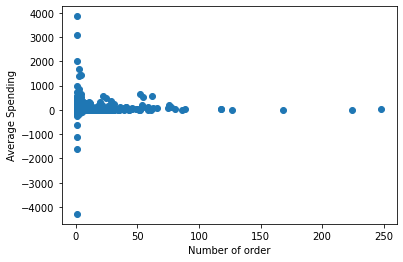

<Figure size 720x720 with 0 Axes>

In [26]:
# scatter plot the sales_customer
import matplotlib.pyplot as plt
plt.scatter(x=sales_customer.Kode_Bayar, y = sales_customer.Total)
plt.ylabel('Average Spending')
plt.xlabel('Number of order')
plt.figure(figsize=(10, 10))
plt.show()

In [27]:
# get id of the minus spending outlier to read in excel
sales_customer.sort_values(by=['Total'], ascending=True).head()

,Kode_Pelanggan,Total,Kode_Barang,Kode_Bayar
3755,17448,-4287.63,1,1
2235,15369,-1592.49,1,1
125,12503,-1126.00,1,1
619,13154,-611.86,1,1
1384,14213,-238.44,5,1


In [28]:
# get id of the big spending outlier to read in excel
sales_customer.sort_values(by=['Total'], ascending=False).head()

,Kode_Pelanggan,Total,Kode_Barang,Kode_Bayar
2102,15195,3861.000000,1,1
603,13135,3096.000000,1,1
4044,17846,2033.100000,1,1
3095,16532,1687.200000,2,3
2521,15749,1435.726667,6,4


In [29]:
# get id of the very loyal outlier to read in excel
sales_customer.sort_values(by=['Kode_Bayar'], ascending=False).head()

,Kode_Pelanggan,Total,Kode_Barang,Kode_Bayar
1894,14911,22.458245,1794,248
330,12748,6.370388,1769,224
4041,17841,5.100301,1331,168
1673,14606,4.218180,832,127
568,13089,30.934771,636,118


In [30]:
# removing outlier with boxplot quantile formula
Q1 = sales_customer['Total'].quantile(0.25)
Q3 = sales_customer['Total'].quantile(0.75)
IQR = Q3 - Q1
Q12 = sales_customer['Kode_Bayar'].quantile(0.25)
Q32 = sales_customer['Kode_Bayar'].quantile(0.75)
IQR2 = Q32 - Q12
filter = (sales_customer['Total'] >= Q1 + 0.5 * IQR) & (sales_customer['Total'] <= Q3 + 1.5 *IQR ) & (sales_customer['Kode_Bayar'] >= Q12 - 1.5 * IQR2) & (sales_customer['Kode_Bayar'] <= Q32 + 1.5 *IQR2)
sales_customer = sales_customer.loc[filter]  

In [31]:
# Standard scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['Total', 'Kode_Barang',	'Kode_Bayar'])
    ], remainder='passthrough')

sales_customer = ct.fit_transform(sales_customer)
sales_customer = pd.DataFrame(sales_customer,  columns = ['Total', 'Kode_Barang',	'Kode_Bayar','Kode_Pelanggan'])

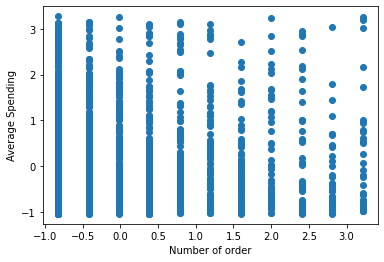

<Figure size 720x720 with 0 Axes>

In [32]:
# scatter plot new sales_customer
plt.scatter(x=sales_customer.Kode_Bayar, y = sales_customer.Total)
plt.ylabel('Average Spending')
plt.xlabel('Number of order')
plt.figure(figsize=(10, 10))
plt.show()

In [33]:
# get Q3 for clustering criteria
m_Kode_Bayar = sales_customer['Kode_Bayar'].quantile(0.75)
m_Total = sales_customer['Total'].quantile(0.75)

In [34]:
# define the cluster
sales_customer['cluster1'] = np.where((sales_customer['Kode_Bayar'] <= m_Kode_Bayar) & (sales_customer['Total'] <= m_Total), 1, 0)
sales_customer['cluster2'] = np.where((sales_customer['Kode_Bayar'] <= m_Kode_Bayar) & (sales_customer['Total'] > m_Total), 2, 0)
sales_customer['cluster3'] = np.where((sales_customer['Kode_Bayar'] > m_Kode_Bayar) & (sales_customer['Total'] <= m_Total), 3, 0)
sales_customer['cluster4'] = np.where((sales_customer['Kode_Bayar'] > m_Kode_Bayar) & (sales_customer['Total'] > m_Total), 4, 0)
sales_customer['cluster'] = sales_customer['cluster1'] + sales_customer['cluster2'] + sales_customer['cluster3'] + sales_customer['cluster4']

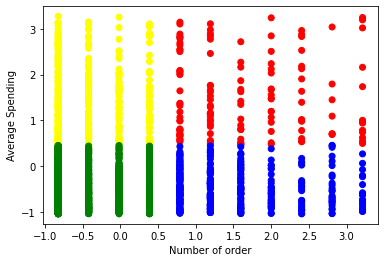

<Figure size 720x720 with 0 Axes>

In [35]:
# scatter plot the new customer cluster
color = np.array(['black', 'green', 'yellow','blue', 'red'])
plt.scatter(x=sales_customer.Kode_Bayar, y = sales_customer.Total, c=color[sales_customer.cluster])
plt.ylabel('Average Spending')
plt.xlabel('Number of order')
plt.figure(figsize=(10, 10))
plt.show()

### 4.	Get the hidden insight from the data

#### a. Our company is following a fundraiser for CRUK (Cancer Research UK)

In [36]:
# show cruk value
df[df['Kode_Barang'] == 'CRUK'].head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Negara,Kode_Pelanggan,Total
377926,564763,CRUK,CRUK Commission,-1,8/30/2011 10:49,1.60,United Kingdom,14096,-1.60
385191,565382,CRUK,CRUK Commission,-1,9/2/2011 15:45,13.01,United Kingdom,14096,-13.01
396535,566216,CRUK,CRUK Commission,-1,9/9/2011 15:17,15.96,United Kingdom,14096,-15.96
403060,566565,CRUK,CRUK Commission,-1,9/13/2011 12:32,52.24,United Kingdom,14096,-52.24
417155,567655,CRUK,CRUK Commission,-1,9/21/2011 14:40,608.66,United Kingdom,14096,-608.66


#### b. Sales perfomance by month

In [37]:
# split month and year
df['month'] = pd.DatetimeIndex(df['Tanggal_Transaksi']).month
df['year'] = pd.DatetimeIndex(df['Tanggal_Transaksi']).year

In [38]:
# create sales_month_year df
sales_month_year = df.groupby(by=['year', 'month']).agg({'Total': 'sum', 'Kode_Barang':'nunique'}).reset_index()
sales_month_year = sales_month_year.sort_values(by=['year','month'], ascending=True)
sales_month_year

,year,month,Total,Kode_Barang
0,2010,12,665139.230,2422
1,2011,1,595690.570,2154
2,2011,2,552975.400,2144
3,2011,3,714306.530,2244
4,2011,4,510875.962,2228
5,2011,5,771437.530,2232
6,2011,6,699742.120,2345
7,2011,7,672840.551,2370
8,2011,8,698698.020,2369
9,2011,9,1039977.312,2552


In [39]:
# get data 2011
sales_month_2011 = sales_month_year[sales_month_year['year'] == 2011]

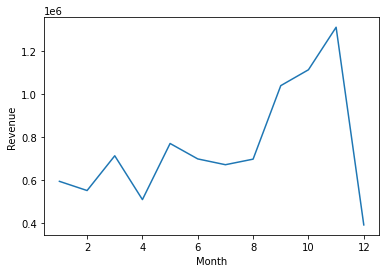

<Figure size 720x720 with 0 Axes>

In [40]:
# plot revenue data 2011
plt.plot(sales_month_2011.month, sales_month_2011.Total)
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.figure(figsize=(10, 10))
plt.show()

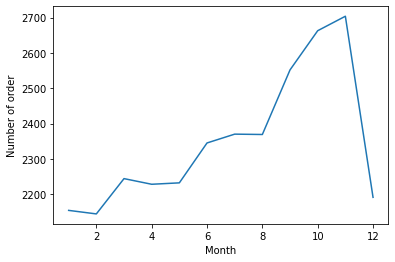

<Figure size 720x720 with 0 Axes>

In [41]:
# plot number of orders data 2011
plt.plot(sales_month_2011.month, sales_month_2011.Kode_Barang)
plt.ylabel('Number of order')
plt.xlabel('Month')
plt.figure(figsize=(10, 10))
plt.show()

In [42]:
# revenue per country in November
rev_coun = df[df['month'] == 11].groupby(by=['Negara']).agg({'Total': 'sum'}).reset_index()
rev_coun.sort_values(by=['Total'], ascending=False).head()

,Negara,Total
21,United Kingdom,1115143.49
9,France,30216.50
7,EIRE,30040.57
10,Germany,27647.87
14,Netherlands,25856.01
